## ImplementingFeedforward neural networks with Keras and TensorFlowfor classification of hand-written MNIST dataset using below steps:
    a.Import the necessary packages
    b.Load the training and testing data
    c.Define the network architecture using Keras
    d.Train the model using SGDwith 11 epochs
    e.Evaluate the network
    f.Plot the training loss and accuracy 

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [5]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [6]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(28*28,)),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='sgd',metrics=['accuracy'],loss=SparseCategoricalCrossentropy())

In [8]:
epochs = 11
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/11
1875/1875 [==============================] - 28s 13ms/step - loss: 0.6813 - accuracy: 0.8180 - val_loss: 0.3385 - val_accuracy: 0.8996
Epoch 2/11
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3098 - accuracy: 0.9120 - val_loss: 0.2656 - val_accuracy: 0.9224
Epoch 3/11
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2596 - accuracy: 0.9253 - val_loss: 0.2312 - val_accuracy: 0.9301
Epoch 4/11
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2283 - accuracy: 0.9352 - val_loss: 0.2077 - val_accuracy: 0.9382
Epoch 5/11
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2037 - accuracy: 0.9410 - val_loss: 0.1859 - val_accuracy: 0.9443
Epoch 6/11
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1829 - accuracy: 0.9475 - val_loss: 0.1686 - val_accuracy: 0.9506
Epoch 7/11
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1654 - accuracy: 0.9526 - val_loss: 0.1579 -

In [9]:
from sklearn.metrics import classification_report
predition = model.predict(X_test)
print(classification_report(y_test,predition.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.97      0.94      0.95      1010
           4       0.97      0.95      0.96       982
           5       0.94      0.96      0.95       892
           6       0.96      0.97      0.96       958
           7       0.95      0.97      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



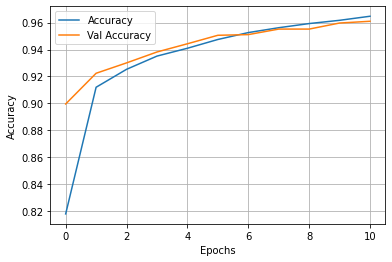

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'Accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

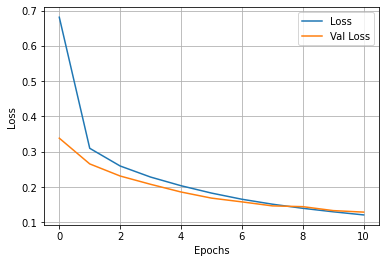

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'Loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();